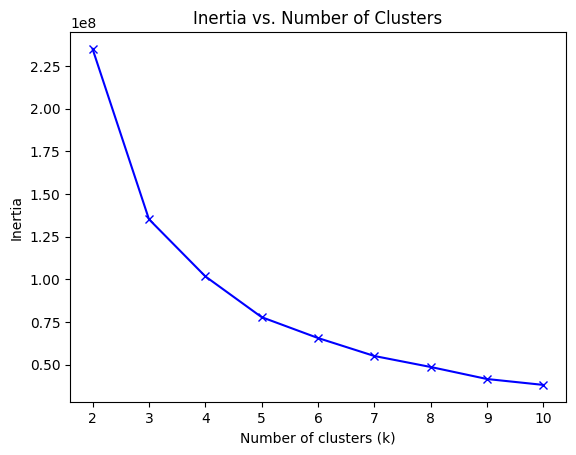

Optimal value of k: 3


In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from tkinter import filedialog
import matplotlib.pyplot as plt

def find_optimal_k(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    pixel_values = image.reshape((-1, 3))

    inertia_values = []
    k_values = range(2, 11)  # Adjust the range of k-values as needed

    for k in k_values:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(pixel_values)
        inertia_values.append(kmeans.inertia_)

    # Plot inertia values for different k-values
    plt.plot(k_values, inertia_values, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Inertia vs. Number of Clusters')
    plt.show()

    # Determine the optimal k using the elbow method
    diff = np.diff(inertia_values)
    diff_r = diff[1:] / diff[:-1]
    optimal_k = k_values[np.argmin(diff_r) + 1]  # Add 1 to account for the removed element in diff_r

    return optimal_k

def segment_image(image_path, num_clusters):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    
    pixel_values = image.reshape((-1, 3))
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pixel_values)
    
    cluster_centers = np.array(kmeans.cluster_centers_, dtype=np.uint8)
    labels = np.array(kmeans.labels_, dtype=np.uint8)
    
    segmented_image = cluster_centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image

image_path = filedialog.askopenfilename()  
optimal_k = find_optimal_k(image_path)
print("Optimal value of k:", optimal_k)

segmented_image = segment_image(image_path, optimal_k)

cv2.imshow("Original Image", cv2.imread(image_path))
cv2.imshow(f"Segmented Image (K={optimal_k})", cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()
